## Johnson Noise versus Temperature

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy import interpolate, optimize

def uncertainty_mean(data_array):
    # returns uncertainty in the mean: max value - min value, divided by 2 sqrt(N)
    return (np.max(data_array) - np.min(data_array))/2/np.sqrt(len(data_array))

### Johnson Noise extracted from measured voltage
As given in the lab notes, we have the Johnson noise given by
$$
    \langle V_J^2 \rangle = \frac{V_M \cdot 10\,\text{V}}{G_1^2 G_2^2}
$$
where $V_M$ is the voltage measured on the multimeter, $G_1 = 600$ AND $G_2$ is given by the main gain settings. Below we can write a function that converts the measured $V_M$ to our Johnson noise.  

In [151]:
def V_johnson(v_meter, G2):
    # returns johnson noise value given measured voltage and gain settings on HLE
    G1 = 600
    return v_meter*10/G1**2/G2**2

### Amplifier Noise Correction
As specified in the lab notes, we should correct for amplifier noise. This is done by measuring the "Johnson Noise" as usual but in this case we'd have
$$
    \langle V_J^2 + V_N^2 \rangle = \frac{V_M \cdot 10\,\text{V}}{G_1^2 G_2^2}
$$
We would measure these values for all the resistors and then extrapolate to the $R=0$ case which would give us
$$
    \langle V_N^2 \rangle = \frac{V_M \cdot 10\,\text{V}}{G_1^2 G_2^2}
$$
This amplifier noise is definitely bandwidth dependent though so be careful!

In [152]:
def amp_noise(resistance_array, initial_v_measured_array):
    # takes as input initial voltage measurements which includes both J and N 
    # contributions for all resistors. Then use an extrapolation scheme to get the R = 0 limit
    # which returns the amplifier noise
    
    interp_func = interpolate.interp1d(resistance_array, initial_v_measured_array, fill_value = 'extrapolate')
    return interp_func(0)

## Temperature vs Voltage Values from TeachSpin Manual for provided diode

Provided temperature arrays

In [153]:
temperature = np.array([77.320, 90.000, 100.000, 110.000, 120.000, 130.000, 140.0, 150.0,\
                       160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0,\
                       260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0,\
                       360.0, 370.0, 380.0, 390.0, 400.0], dtype = 'float') # in Kelvin

voltage = np.array([994.419, 967.032, 944.477, 921.305, 897.616, 873.417, 848.864, 823.964, 798.691,\
                    773.213, 747.485, 721.533, 695.363, 669.002, 642.448, 615.748, 588.907,\
                    561.837, 534.655, 507.311, 479.881, 452.258, 424.465, 396.645, 368.731,\
                   340.625, 312.542, 284.206, 255.855, 227.428, 198.940, 170.463, 142.124], dtype = 'float') # in mV 

In [154]:
voltage2 = np.flip(voltage)
temp2 = np.flip(temperature)

### Declaring the Interpolation function
1. Can now call this function for a given voltage reading which then gives a corresponding temperature

In [155]:
voltage_func = interpolate.interp1d(voltage, temperature)
voltage_func_2 = interpolate.CubicSpline(voltage2, temp2, extrapolate = True)

### Today
1. Measured $R_A$, $R_B$, and $R_C$ with respect to ground.
2. Measured heater leads with black ground lead connected to H1 and red lead to H2 and found it to be $76.31\,\Omega$
3. Measured $D_1, D_2$ with black lead connected to ground and found $D_1 = 0.5496\,V$ and $D_2 = 0.5495\,V$. 

In [156]:
Ra = np.mean(np.array([12.09, 12.08, 12.07, 11.85, 11.84,\
                       12.51, 12.41, 12.29])) # Ra is 10Ohms but expected to read 12 Ohms
Ra

12.1425

In [157]:
Rb = 9.963 # kOmega, quoted value is 10 kOhms

In [158]:
Rc = 100.53 #kOmega

###  Johnson Noise of 3 resistors in probe at room temperature
Settings
1. 1 kHz High Pass, 10 kHz Low Pass, G1 = 600, Gain (G2): x10, x10, x30 = 3000, time scale = 1 sec

In [159]:
Ra_external = np.mean(np.array([0.194547, 0.193429, 0.195737, 0.195721,\
                        0.196106, 0.195430, 0.195633, 0.192751, 0.193008, 0.193939])) #A_ext in Volts
Ra_external

0.1946301

In [160]:
Rb_external = np.mean(np.array([0.728056, 0.722688, 0.722080, 0.721732, 0.723188])) #B_ext in Volts
Rb_external

0.7235488000000001

In [161]:
Rc_external = np.mean(np.array([3.58368, 3.56766, 3.56448, 3.57698, 3.58477])) #C_ext in Volts
Rc_external

3.5755139999999996

In [162]:
local_10_Ohm = np.mean(np.array([0.195177, 0.195569, 0.196169, 0.195764, 0.196221])) # 10 Ohm Volts 
local_10_Ohm

0.19577999999999998

In [163]:
local_100_Ohm = np.mean(np.array([0.199624, 0.200114, 0.200108, 0.199794, 0.199242])) # 100 Ohm Volts
local_100_Ohm

0.19977640000000002

In [164]:
local_1k_Ohm = np.mean(np.array([0.247355, 0.247939, 0.247466, 0.247704, 0.248407])) # 1k Ohm Volts
local_1k_Ohm

0.2477742

In [165]:
local_10k_Ohm = np.mean(np.array([0.736071, 0.729467, 0.729338, 0.735419, 0.732056])) # 10k Ohm Volts
local_10k_Ohm

0.7324702000000001

In [166]:
local_100k_Ohm = np.mean(np.array([4.44871, 4.45904, 4.44654, 4.43178, 4.43544])) # 100k Ohm Volts
local_100k_Ohm

4.4443019999999995

In [167]:
local_1M_Ohm = np.mean(np.array([9.37254, 9.37609, 9.38618, 9.38147, 9.37389])) # 1M Ohm Volts
local_1M_Ohm

9.378034

### Johnson Noise
1. f1 = .1 kHz, f2 = 33 kHz, G1 = 600, G2 = x10, x10, x30, time constant = 1sec

In [168]:
Ra_ext_second = np.mean(np.array([0.726078, 0.726324, 0.727658, 0.727999, 0.728130]))
Rb_ext_second = np.mean(np.array([2.50768, 2.50411, 2.49668, 2.51199, 2.50718]))
Rc_ext_second = np.mean(np.array([5.68388, 5.73871, 5.71609, 5.72403, 5.73871]))

local_10Ohm_second = np.mean(np.array([7.27333, 7.26541]))

### Temperature Dependence

In [169]:
#input_current = np.array([10**(-8), 10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3)]) #A
#voltage = np.array([0.24773, 0.31007, 0.3704, 0.43, 0.4892, 0.5484]) # V

In [170]:
def temp(voltage1, voltage2):
    # NEED TO MAKE SURE THEY ARE RIGHT NEXT TO EACH OTHER, OFF BY FACTOR OF 10
    electron_e = -1.602*10**(-19) #C
    kB = 1.381*10**(-23) # J/K
    return np.abs(electron_e*(voltage2 - voltage1)/kB/np.log(10))

In [171]:
remote_resistance = np.array([12.1425, 9.963*10**3, 100.53*10**3])

### Temp 1

In [172]:
temp_1 = voltage_func(976.4)

#current = np.array([10**(-6), 10**(-5)])
#voltagee = np.array([976.4, 992.1])

# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_1 = V_johnson(np.mean(np.array([0.195443, 0.19489, .194389, 0.194144, 0.194088])), 3000)
RB_voltage_1 = V_johnson(np.mean(np.array([0.336680, 0.336590, 0.335118, 0.33579, 0.336443])), 3000)
RC_voltage_1 = V_johnson(np.mean(np.array([1.26217, 1.26449, 1.27028, 1.27514, 1.27740])), 3000)

# error
RA_voltage_1_err = uncertainty_mean(V_johnson(np.array([0.195443, 0.19489, .194389, 0.194144, 0.194088]),3000))
RB_voltage_1_err = uncertainty_mean(V_johnson(np.array([0.336680, 0.336590, 0.335118, 0.33579, 0.336443]),3000))
RC_voltage_1_err = uncertainty_mean(V_johnson(np.array([1.26217, 1.26449, 1.27028, 1.27514, 1.27740]),3000))

# extrapolate to calculate amplifier noise
amp_noise_t1 = amp_noise(remote_resistance, np.array([RA_voltage_1, RB_voltage_1, RC_voltage_1]))

# subtract off amp_noise
RA_voltage_1_f = RA_voltage_1 - amp_noise_t1
RB_voltage_1_f = RB_voltage_1 - amp_noise_t1
RC_voltage_1_f = RC_voltage_1 - amp_noise_t1

In [173]:
RC_voltage_1_err

1.0510899783123894e-14

### Temp 2

In [174]:
temp_2 = voltage_func(935)
#current_2 = np.array([10**(-6), 10**(-5)])
#voltage_2 = np.array([0.9388, 0.9489])

RA_voltage_2 = np.mean(np.array([0.195726, 0.196075, 0.195479]))
RB_voltage_2 = np.mean(np.array([0.366640, 0.367263, 0.366942]))
RC_voltage_2 = np.mean(np.array([1.45976, 1.45428, 1.45598]))

# error
RA_voltage_2_err = uncertainty_mean(V_johnson(np.array([0.195726, 0.196075, 0.195479]),3000))
RB_voltage_2_err = uncertainty_mean(V_johnson(np.array([0.366640, 0.367263, 0.366942]),3000))
RC_voltage_2_err = uncertainty_mean(V_johnson(np.array([1.45976, 1.45428, 1.45598]),3000))

# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_2 = V_johnson(RA_voltage_2, 3000)
RB_voltage_2 = V_johnson(RB_voltage_2, 3000)
RC_voltage_2 = V_johnson(RC_voltage_2, 3000)

array_2 = np.array([RA_voltage_2, RB_voltage_2, RC_voltage_2])

# extrapolate to calculate amplifier noise
amp_noise_t2 = amp_noise(remote_resistance, array_2)

# subtract off amp_noise
RA_voltage_2_f = RA_voltage_2 - amp_noise_t2
RB_voltage_2_f = RB_voltage_2 - amp_noise_t2
RC_voltage_2_f = RC_voltage_2 - amp_noise_t2

### Temp 3

In [175]:
temp_3 = voltage_func(910)
#current_2 = np.array([10**(-6), 10**(-5)])
#voltage_2 = np.array([0.9388, 0.9489])

RA_voltage_3 = np.mean(np.array([0.195508, 0.195207, 0.195799]))
RB_voltage_3 = np.mean(np.array([0.382998, 0.381071, 0.381900]))
RC_voltage_3 = np.mean(np.array([1.59360, 1.59898, 1.60688]))

# error
RA_voltage_3_err = uncertainty_mean(V_johnson(np.array([0.195508, 0.195207, 0.195799]),3000))
RB_voltage_3_err = uncertainty_mean(V_johnson(np.array([0.382998, 0.381071, 0.381900]),3000))
RC_voltage_3_err = uncertainty_mean(V_johnson(np.array([1.59360, 1.59898, 1.60688]),3000))

# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_3 = V_johnson(RA_voltage_3, 3000)
RB_voltage_3 = V_johnson(RB_voltage_3, 3000)
RC_voltage_3 = V_johnson(RC_voltage_3, 3000)

array_3 = np.array([RA_voltage_3, RB_voltage_3, RC_voltage_3])

# extrapolate to calculate amplifier noise
amp_noise_t3 = amp_noise(remote_resistance, array_3)

# subtract off amp_noise
RA_voltage_3_f = RA_voltage_3 - amp_noise_t3
RB_voltage_3_f = RB_voltage_3 - amp_noise_t3
RC_voltage_3_f = RC_voltage_3 - amp_noise_t3

### Temp 4
1. Note: heater setting for keeping it stable is around 6 which reads 0.179863 V

In [176]:
temp_4 = voltage_func(890.6)
RA_voltage_4 = np.mean(np.array([0.195256, 0.195034, 0.194448, 0.194834, 0.195412]))
RB_voltage_4 = np.mean(np.array([.396987, 0.397123, 0.397214, 0.396110, 0.397043]))
RC_voltage_4 = np.mean(np.array([1.68980, 1.69708, 1.69158, 1.69165, 1.68785]))

# error
RA_voltage_4_err = uncertainty_mean(V_johnson(np.array([0.195256, 0.195034, 0.194448, 0.194834, 0.195412]),3000))
RB_voltage_4_err = uncertainty_mean(V_johnson(np.array([.396987, 0.397123, 0.397214, 0.396110, 0.397043]),3000))
RC_voltage_4_err = uncertainty_mean(V_johnson(np.array([1.68980, 1.69708, 1.69158, 1.69165, 1.68785]),3000))

# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_4 = V_johnson(RA_voltage_4, 3000)
RB_voltage_4 = V_johnson(RB_voltage_4, 3000)
RC_voltage_4 = V_johnson(RC_voltage_4, 3000)

array_4 = np.array([RA_voltage_4, RB_voltage_4, RC_voltage_4])

# extrapolate to calculate amplifier noise
amp_noise_t4 = amp_noise(remote_resistance, array_4)

# subtract off amp_noise
RA_voltage_4_f = RA_voltage_4 - amp_noise_t4
RB_voltage_4_f = RB_voltage_4 - amp_noise_t4
RC_voltage_4_f = RC_voltage_4 - amp_noise_t4

### Temp 5

In [177]:
temp_5 = voltage_func(848.2)
RA_voltage_5 = np.mean(np.array([0.197195, 0.197095, 0.196684]))
RB_voltage_5 = np.mean(np.array([0.423684, 0.423168, 0.424735]))
RC_voltage_5 = np.mean(np.array([1.88048, 1.86941, 1.87069]))

# error
RA_voltage_5_err = uncertainty_mean(V_johnson(np.array([0.197195, 0.197095, 0.196684]),3000))
RB_voltage_5_err = uncertainty_mean(V_johnson(np.array([0.423684, 0.423168, 0.424735]),3000))
RC_voltage_5_err = uncertainty_mean(V_johnson(np.array([1.88048, 1.86941, 1.87069]),3000))


# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_5 = V_johnson(RA_voltage_5, 3000)
RB_voltage_5 = V_johnson(RB_voltage_5, 3000)
RC_voltage_5 = V_johnson(RC_voltage_5, 3000)

array_5 = np.array([RA_voltage_5, RB_voltage_5, RC_voltage_5])

# extrapolate to calculate amplifier noise
amp_noise_t5 = amp_noise(remote_resistance, array_5)

# subtract off amp_noise
RA_voltage_5_f = RA_voltage_5 - amp_noise_t5
RB_voltage_5_f = RB_voltage_5 - amp_noise_t5
RC_voltage_5_f = RC_voltage_5 - amp_noise_t5

### Temp 6

In [178]:
temp_6 = voltage_func(800)
RA_voltage_6 = np.mean(np.array([0.197199, 0.197055, 0.196566]))
RB_voltage_6 = np.mean(np.array([0.458855, 0.455989, 0.454288]))
RC_voltage_6 = np.mean(np.array([2.06729, 2.05794, 2.05324]))

# error
RA_voltage_6_err = uncertainty_mean(V_johnson(np.array([0.197199, 0.197055, 0.196566]),3000))
RB_voltage_6_err = uncertainty_mean(V_johnson(np.array([0.458855, 0.455989, 0.454288]),3000))
RC_voltage_6_err = uncertainty_mean(V_johnson(np.array([2.06729, 2.05794, 2.05324]),3000))

# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_6 = V_johnson(RA_voltage_6, 3000)
RB_voltage_6 = V_johnson(RB_voltage_6, 3000)
RC_voltage_6 = V_johnson(RC_voltage_6, 3000)

array_6 = np.array([RA_voltage_6, RB_voltage_6, RC_voltage_6])

# extrapolate to calculate amplifier noise
amp_noise_t6 = amp_noise(remote_resistance, array_6)

# subtract off amp_noise
RA_voltage_6_f = RA_voltage_6 - amp_noise_t6
RB_voltage_6_f = RB_voltage_6 - amp_noise_t6
RC_voltage_6_f = RC_voltage_6 - amp_noise_t6

### Temp 7

In [179]:
temp_7 = voltage_func(750)
RA_voltage_7 = np.mean(np.array([0.196952, 0.196629, 0.197968]))
RB_voltage_7 = np.mean(np.array([0.489298, 0.487773, 0.487198]))
RC_voltage_7 = np.mean(np.array([2.27747, 2.2778, 2.27119]))

# error
RA_voltage_7_err = uncertainty_mean(V_johnson(np.array([0.196952, 0.196629, 0.197968]),3000))
RB_voltage_7_err = uncertainty_mean(V_johnson(np.array([0.489298, 0.487773, 0.487198]),3000))
RC_voltage_7_err = uncertainty_mean(V_johnson(np.array([2.27747, 2.2778, 2.27119]),3000))


# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_7 = V_johnson(RA_voltage_7, 3000)
RB_voltage_7 = V_johnson(RB_voltage_7, 3000)
RC_voltage_7 = V_johnson(RC_voltage_7, 3000)

array_7 = np.array([RA_voltage_7, RB_voltage_7, RC_voltage_7])

# extrapolate to calculate amplifier noise
amp_noise_t7 = amp_noise(remote_resistance, array_7)

# subtract off amp_noise
RA_voltage_7_f = RA_voltage_7 - amp_noise_t7
RB_voltage_7_f = RB_voltage_7 - amp_noise_t7
RC_voltage_7_f = RC_voltage_7 - amp_noise_t7

### Temp 8

In [180]:
temp_8 = voltage_func(700)
RA_voltage_8 = np.mean(np.array([0.196334, 0.196229, 0.196680]))
RB_voltage_8 = np.mean(np.array([0.515388, 0.511059, 0.513598]))
RC_voltage_8 = np.mean(np.array([2.45580, 2.45880, 2.45778]))

# error
RA_voltage_8_err = uncertainty_mean(V_johnson(np.array([0.196334, 0.196229, 0.196680]),3000))
RB_voltage_8_err = uncertainty_mean(V_johnson(np.array([0.515388, 0.511059, 0.513598]),3000))
RC_voltage_8_err = uncertainty_mean(V_johnson(np.array([2.45580, 2.45880, 2.45778]),3000))


# calculate < Vout^2 >, ie Johnson noise including amplifier noise
RA_voltage_8 = V_johnson(RA_voltage_8, 3000)
RB_voltage_8 = V_johnson(RB_voltage_8, 3000)
RC_voltage_8 = V_johnson(RC_voltage_8, 3000)

array_8 = np.array([RA_voltage_8, RB_voltage_8, RC_voltage_8])

# extrapolate to calculate amplifier noise
amp_noise_t8 = amp_noise(remote_resistance, array_8)

# subtract off amp_noise
RA_voltage_8_f = RA_voltage_8 - amp_noise_t8
RB_voltage_8_f = RB_voltage_8 - amp_noise_t8
RC_voltage_8_f = RC_voltage_8 - amp_noise_t8

In [181]:
temperatures = np.array([temp_1, temp_2, temp_3, temp_4, temp_5, temp_6, temp_7, temp_8])

RA = np.array([RA_voltage_1, RA_voltage_2, RA_voltage_3, RA_voltage_4, RA_voltage_5,\
                  RA_voltage_6, RA_voltage_7, RA_voltage_8], dtype = 'float')
RB = np.array([RB_voltage_1, RB_voltage_2, RB_voltage_3, RB_voltage_4, RB_voltage_5,\
                  RB_voltage_6, RB_voltage_7, RB_voltage_8], dtype = 'float')
RC = np.array([RC_voltage_1, RC_voltage_2, RC_voltage_3, RC_voltage_4, RC_voltage_5,\
                  RC_voltage_6, RC_voltage_7, RC_voltage_8], dtype = 'float')

RAF = np.array([RA_voltage_1_f, RA_voltage_2_f, RA_voltage_3_f, RA_voltage_4_f, RA_voltage_5_f,\
                  RA_voltage_6_f, RA_voltage_7_f, RA_voltage_8_f], dtype = 'float')
RBF = np.array([RB_voltage_1_f, RB_voltage_2_f, RB_voltage_3_f, RB_voltage_4_f, RB_voltage_5_f,\
                  RB_voltage_6_f, RB_voltage_7_f, RB_voltage_8_f], dtype = 'float')
RCF = np.array([RC_voltage_1_f, RC_voltage_2_f, RC_voltage_3_f, RC_voltage_4_f, RC_voltage_5_f,\
                  RC_voltage_6_f, RC_voltage_7_f, RC_voltage_8_f], dtype = 'float')

### Linear Regression

In [182]:
m_RA, y_int_RA = np.polyfit(temperatures, RA, deg = 1)
m_RB, y_int_RB = np.polyfit(temperatures, RB, deg = 1)
m_RC, y_int_RC = np.polyfit(temperatures, RC, deg = 1)

m_RAF, y_int_RAF = np.polyfit(temperatures, RAF, deg = 1)
m_RBF, y_int_RBF = np.polyfit(temperatures, RBF, deg = 1)
m_RCF, y_int_RCF = np.polyfit(temperatures, RCF, deg = 1)

In [183]:
m_RA

6.048017784239187e-17

In [184]:
# curve fit regression
def linear(x, m, b):
    return x*m + b

def cov(resistor):
    m_resistor_params, m_resistor_cov = optimize.curve_fit(linear, temperatures, resistor)
    return np.sqrt(m_resistor_cov[0,0])

In [185]:
optimize.curve_fit(linear, temperatures, RA)

(array([6.04801978e-17, 5.96735768e-13]),
 array([[ 4.12112457e-34, -5.68933453e-32],
        [-5.68933453e-32,  8.39176744e-30]]))

In [186]:
cov(RA)

2.030055312636635e-17

In [187]:
RA_err = np.array([RA_voltage_1_err, RA_voltage_2_err, RA_voltage_3_err, RA_voltage_4_err, RA_voltage_5_err\
                  , RA_voltage_7_err, RA_voltage_7_err, RA_voltage_8_err])
RB_err = np.array([RB_voltage_1_err, RB_voltage_2_err, RB_voltage_3_err, RB_voltage_4_err, RB_voltage_5_err\
                  , RB_voltage_7_err, RB_voltage_7_err, RB_voltage_8_err])
RC_err = np.array([RC_voltage_1_err, RC_voltage_2_err, RC_voltage_3_err, RC_voltage_4_err, RC_voltage_5_err\
                  , RC_voltage_7_err, RC_voltage_7_err, RC_voltage_8_err])

In [188]:
RC_err

array([1.05108998e-14, 4.88253005e-15, 1.18321166e-14, 6.37003316e-15,
       9.86306710e-15, 5.88932913e-15, 5.88932913e-15, 2.67291791e-15])

### Plotting Things 

#### Uncorrected Data

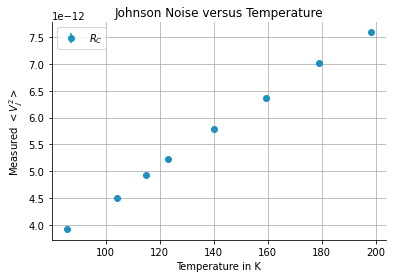

In [189]:
#plt.errorbar(temperatures, RA, yerr = RA_err, label = '$R_A$', color = '#253494')
#plt.errorbar(temperatures, RB, yerr = RB_err, label = '$R_B$', color = '#225ea8')
plt.errorbar(temperatures, RC, yerr = RC_err, fmt = 'o', label = '$R_C$', color = '#1d91c0')

#plt.plot(temperatures, m_RC*temperatures + y_int_RC, color = 'black')
#plt.plot(temperatures, m_RA*temperatures + y_int_RA, color = 'black')
#plt.plot(temperatures, m_RB*temperatures + y_int_RB, color = 'black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 0)

plt.xlabel("Temperature in K")
plt.ylabel("Measured $< V_J ^2 >$")
plt.grid()
plt.title("Johnson Noise versus Temperature")
plt.savefig('Johnson_Noise_versus_temperature.pdf', bbox_inches='tight')

plt.show()

### Need to correct the above
1. Amplifier Noise
2. Johnson Noise

### Corrected Data

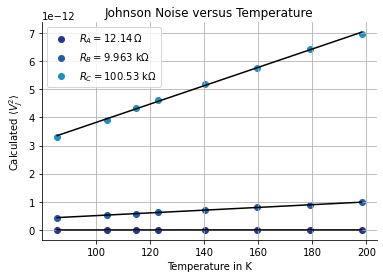

In [190]:
plt.scatter(temperatures, RAF, label = '$R_A = 12.14\,\Omega$', color = '#253494')
plt.scatter(temperatures, RBF, label = '$R_B = 9.963$ k$\Omega$', color = '#225ea8')
plt.scatter(temperatures, RCF, label = '$R_C = 100.53$ k$\Omega$', color = '#1d91c0')

plt.plot(temperatures, m_RCF*temperatures + y_int_RCF, color = 'black')
plt.plot(temperatures, m_RAF*temperatures + y_int_RAF, color = 'black')
plt.plot(temperatures, m_RBF*temperatures + y_int_RBF, color = 'black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 0)

plt.xlabel("Temperature in K")
plt.ylabel(r"Calculated $\langle V_J ^2 \rangle$")
plt.grid()
plt.title("Johnson Noise versus Temperature")
plt.savefig('Johnson_Noise_versus_temperature_corrected.pdf', bbox_inches='tight')

plt.show()

In [193]:
cov(RCF)

4.534370955343248e-16

In [133]:
def predicted_slope(resistance):
    kB = 1.381*10**(-23)
    df = 9997
    return 4*kB*df*resistance

In [136]:
predicted_slope(100.53*1000)

5.5516112168400005e-14

### RA

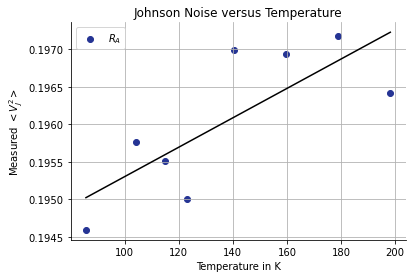

In [49]:
plt.scatter(temperatures, RA, label = '$R_A$', color = '#253494')
#plt.scatter(temperatures, RB, label = '$R_B$', color = '#225ea8')
#plt.scatter(temperatures, RC, label = '$R_C$', color = '#1d91c0')

#plt.plot(temperatures, m_RC*temperatures + y_int_RC, color = 'black')
plt.plot(temperatures, m_RA*temperatures + y_int_RA, color = 'black')
#plt.plot(temperatures, m_RB*temperatures + y_int_RB, color = 'black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 0)

plt.xlabel("Temperature in K")
plt.ylabel("Measured $< V_J ^2 >$")
plt.grid()
plt.title("Johnson Noise versus Temperature")
plt.savefig('Johnson_Noise_versus_temperature_RA.pdf', bbox_inches='tight')

plt.show()